In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
sns.set(color_codes=True)

In [2]:
data = pd.read_csv("Training_Data.csv")

In [3]:
data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


# Data Preprocessing

In [4]:
data.drop(columns = ["Id","CITY"], inplace = True)
data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tamil_Nadu,3,14,1


In [5]:
data.select_dtypes(include='object').nunique()

Married/Single      2
House_Ownership     3
Car_Ownership       2
Profession         51
STATE              29
dtype: int64

In [6]:
data.select_dtypes(include='int').nunique()

Income               41920
Age                     59
Experience              21
CURRENT_JOB_YRS         15
CURRENT_HOUSE_YRS        5
Risk_Flag                2
dtype: int64

# Segementing Profession into Smaller Unique Values

In [7]:
data['Profession'].unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [8]:
def segment_profession(profession):
    if profession in ['Mechanical_engineer','Design_Engineer','Chemical_engineer',
                     'Biomedical_Engineer','Computer_hardware_engineer','Petroleum_Engineer',
                     'Engineer','Civil_engineer', 'Industrial_Engineer']:
        return 'Engineering'
    elif profession in ['Software_Developer','Technical_writer','Graphic_Designer',
                       'Web_designer']:
        return 'IT/Software'
    elif profession in ['Civil_servant', 'Politician', 'Police_officer', 'Magistrate', 'Lawyer',
                        'Official','Army_Officer']:
        return 'Government'
    elif profession in ['Librarian', 'Teacher']:
        return 'Education'
    elif profession in ['Economist', 'Financial Analyst']:
        return 'Finance'
    elif profession in ['Flight_attendant', 'Air_traffic_controller', 'Aviator']:
        return 'Aviation'
    elif profession in ['Architect', 'Designer', 'Fashion_Designer']:
        return 'Design'
    elif profession in ['Physician', 'Dentist', 'Surgeon']:
        return 'Medical'
    elif profession in ['Hotel Manager','Chef']:
        return 'Hospitality'
    elif profession == 'Artist':
        return 'Art'
    elif profession in ['Comedian' , 'Psychologist']:
        return 'Entertainment'
    elif profession in ['Secretary', 'Computer_operator']:
        return 'Administration'
    elif profession in ['Chartered_Accountant', 'Analyst']:
        return 'Finance/Accounting'
    elif profession in ['Technician', 'Microbiologist', 'Scientist', 'Geologist', 'Statistician']:
        return 'Science Research'
    else:
        return 'Other'
    
data['Profession'] = data['Profession'].apply(segment_profession)

In [9]:
data['Profession'].unique()

array(['Engineering', 'IT/Software', 'Government', 'Education', 'Finance',
       'Aviation', 'Design', 'Medical', 'Other', 'Art', 'Entertainment',
       'Administration', 'Finance/Accounting', 'Science Research',
       'Hospitality'], dtype=object)

<AxesSubplot:>

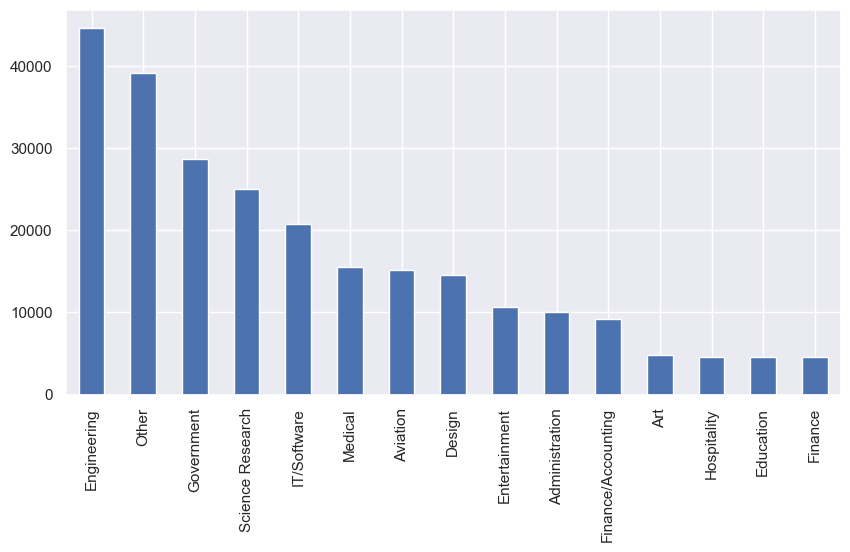

In [10]:
plt.figure(figsize = (10,5))
data['Profession'].value_counts().plot(kind='bar')


# Segementing State into Smaller Unique Values

In [11]:
data['STATE'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [12]:
def segment_state(STATE):
    if STATE in ['Punjab','Uttar_Pradesh','Haryana','Himachal_Pradesh','Jammu_and_Kashmir',
                 'Delhi','Chandigarh','Uttarakhand']:
        return 'North India'
    elif STATE in ['Kerala','Tamil_Nadu','Puducherry','Karnataka','Telangana','Andhra_Pradesh']:
        return 'South India'
    elif STATE in ['Odisha','Bihar','West_Bengal','Jharkhand']:
        return 'East India'
    elif STATE in ['Maharashtra','Gujarat']:
        return 'West India'
    elif STATE in ['Madhya_Pradesh','Chhattisgarh']:
        return 'Central India'
    elif STATE in ['Tripura','Mizoram','Assam','Manipur','Sikkim']:
        return 'North-East India'
    elif STATE in ['Rajasthan']:
        return 'North-West India'
    else:
        return 'Unknown'
    
data['STATE'] = data['STATE'].apply(segment_state)

<AxesSubplot:>

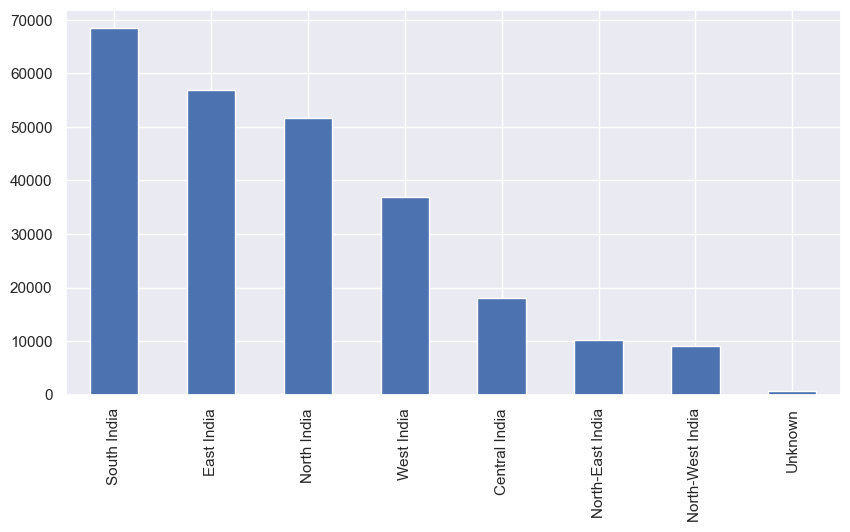

In [13]:
plt.figure(figsize=(10,5))
data['STATE'].value_counts().plot(kind='bar')

# Exploratory Data Analysis

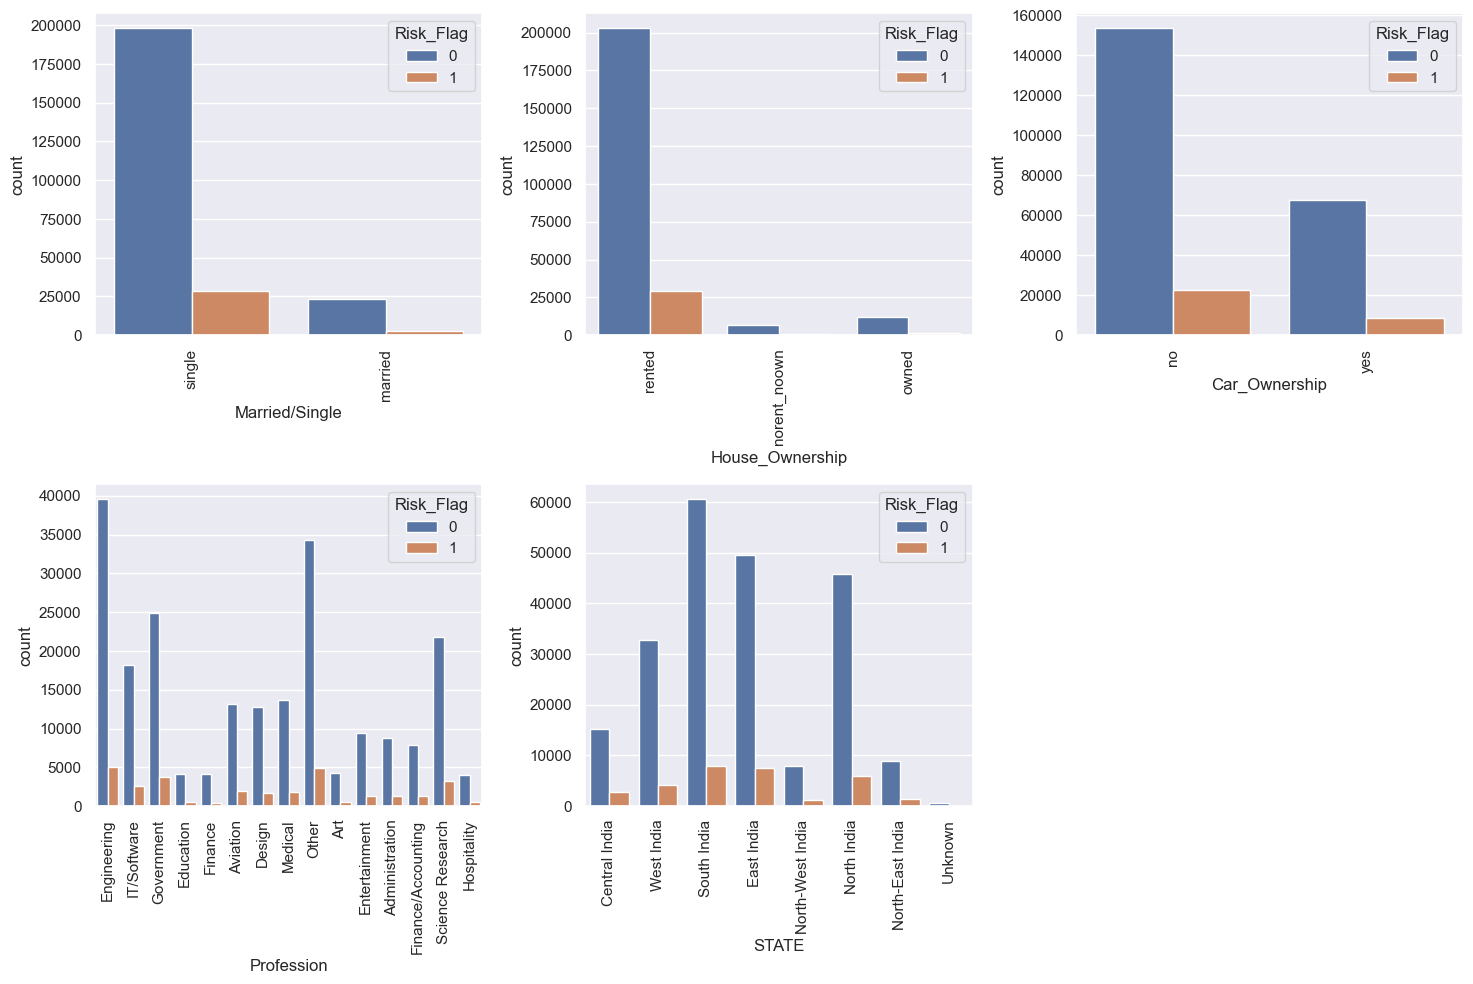

In [14]:
# list of categorical variables to plot
cat_vars = ['Married/Single', 'House_Ownership', 'Car_Ownership',
            'Profession', 'STATE']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Risk_Flag', data=data, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# remove the sixth subplot
fig.delaxes(axs[5])

# show plot
plt.show()

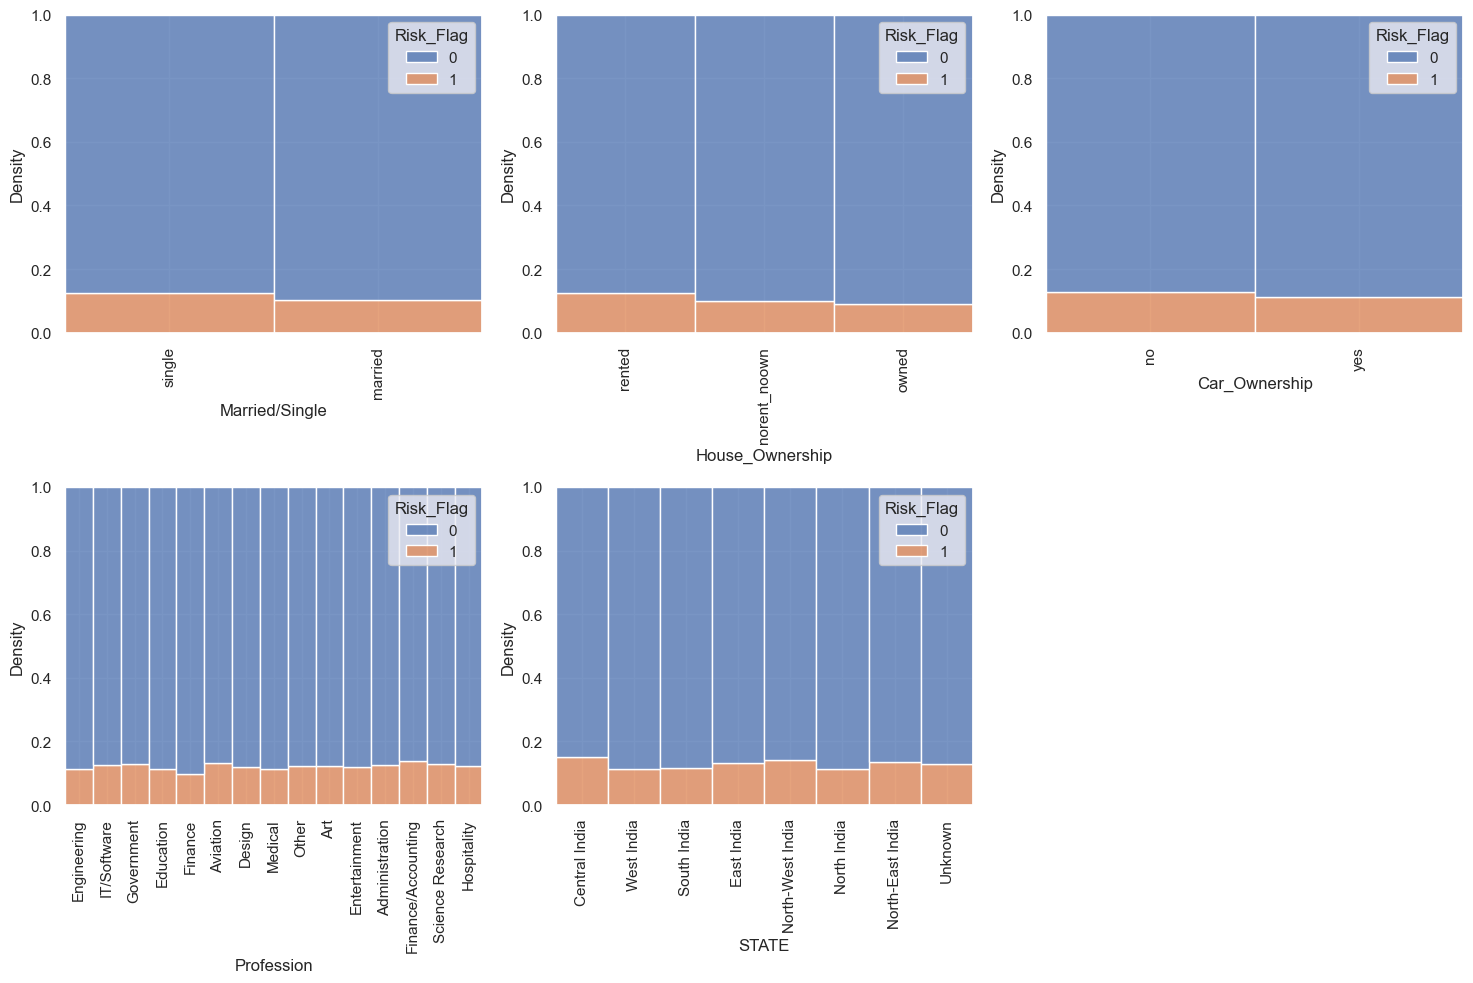

In [15]:
import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars = ['Married/Single', 'House_Ownership', 'Car_Ownership',
            'Profession', 'STATE']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Risk_Flag', data=data, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(data[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# remove the sixth subplot
fig.delaxes(axs[5])

# show plot
plt.show()

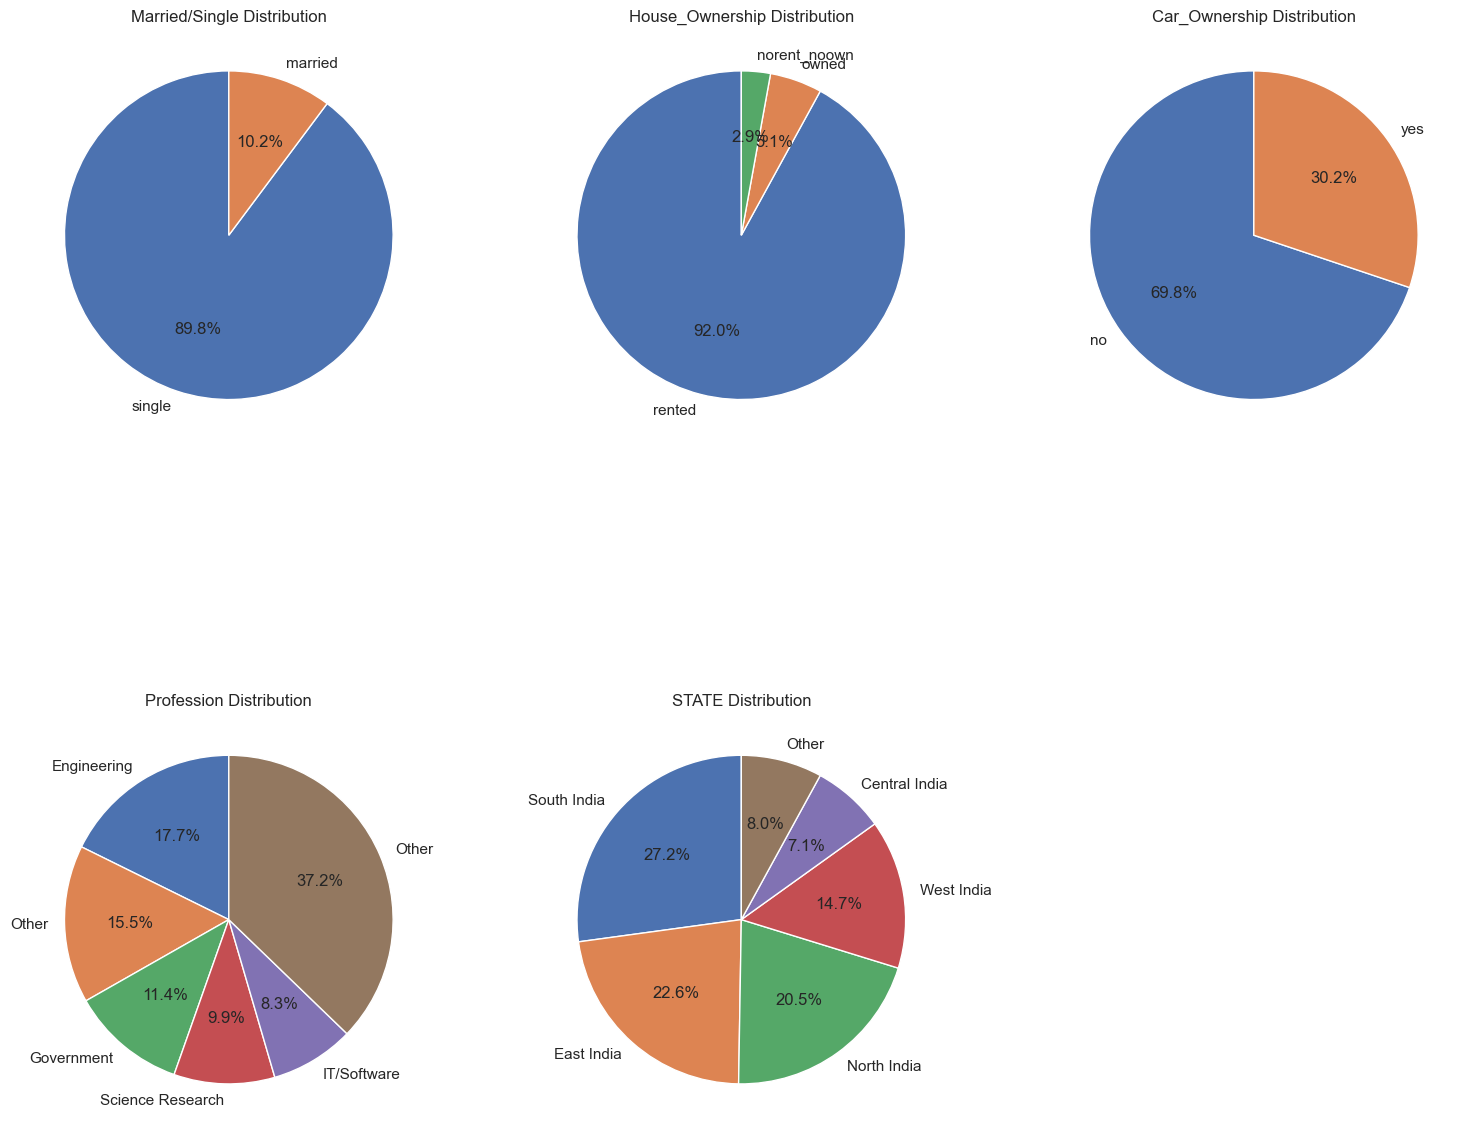

In [16]:
# Specify the maximum number of categories to show individually
max_categories = 5

cat_vars = ['Married/Single', 'House_Ownership', 'Car_Ownership',
            'Profession', 'STATE']

# Create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# Create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # Count the number of occurrences for each category
        cat_counts = data[var].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # Set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# remove sixth plot
fig.delaxes(axs[1][2])

# Show the plot
plt.show()

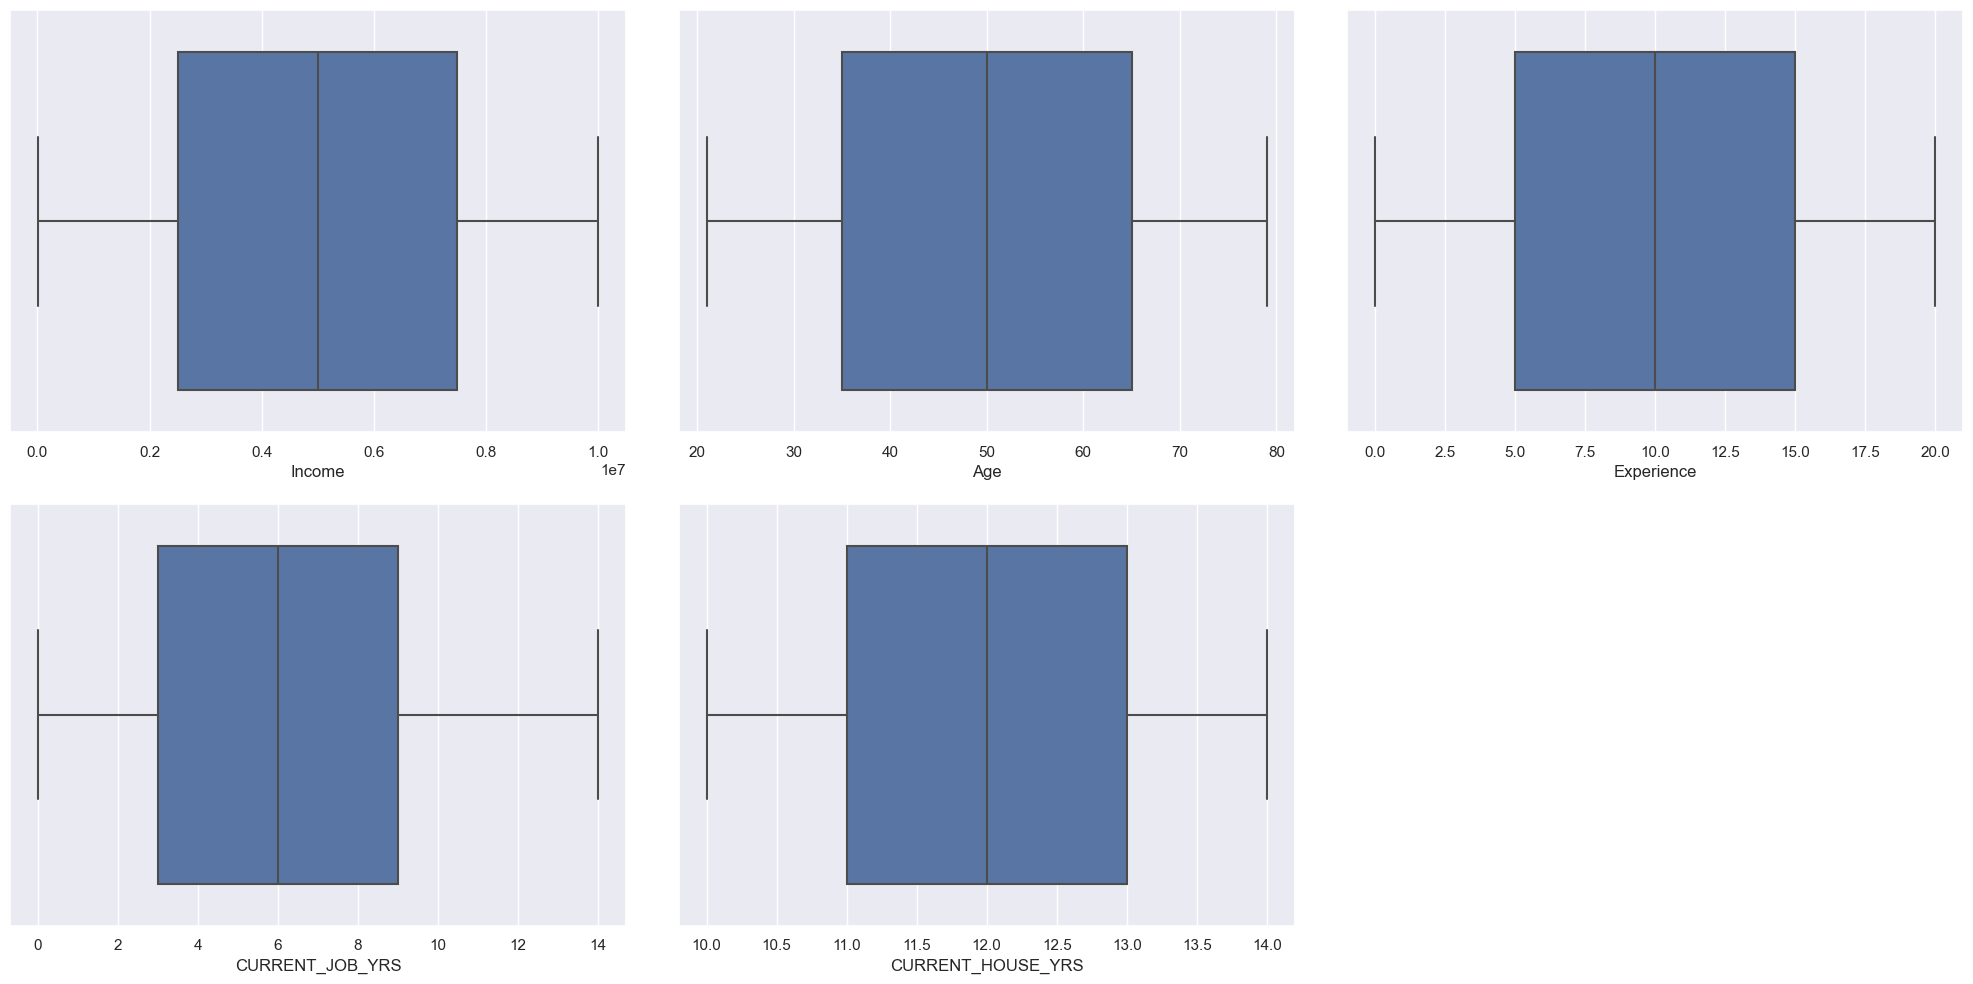

In [17]:
num_vars = ['Income', 'Age', 'Experience', 
            'CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=data, ax=axs[i])

fig.tight_layout()

# remove the sixth subplot
fig.delaxes(axs[5])

plt.show()

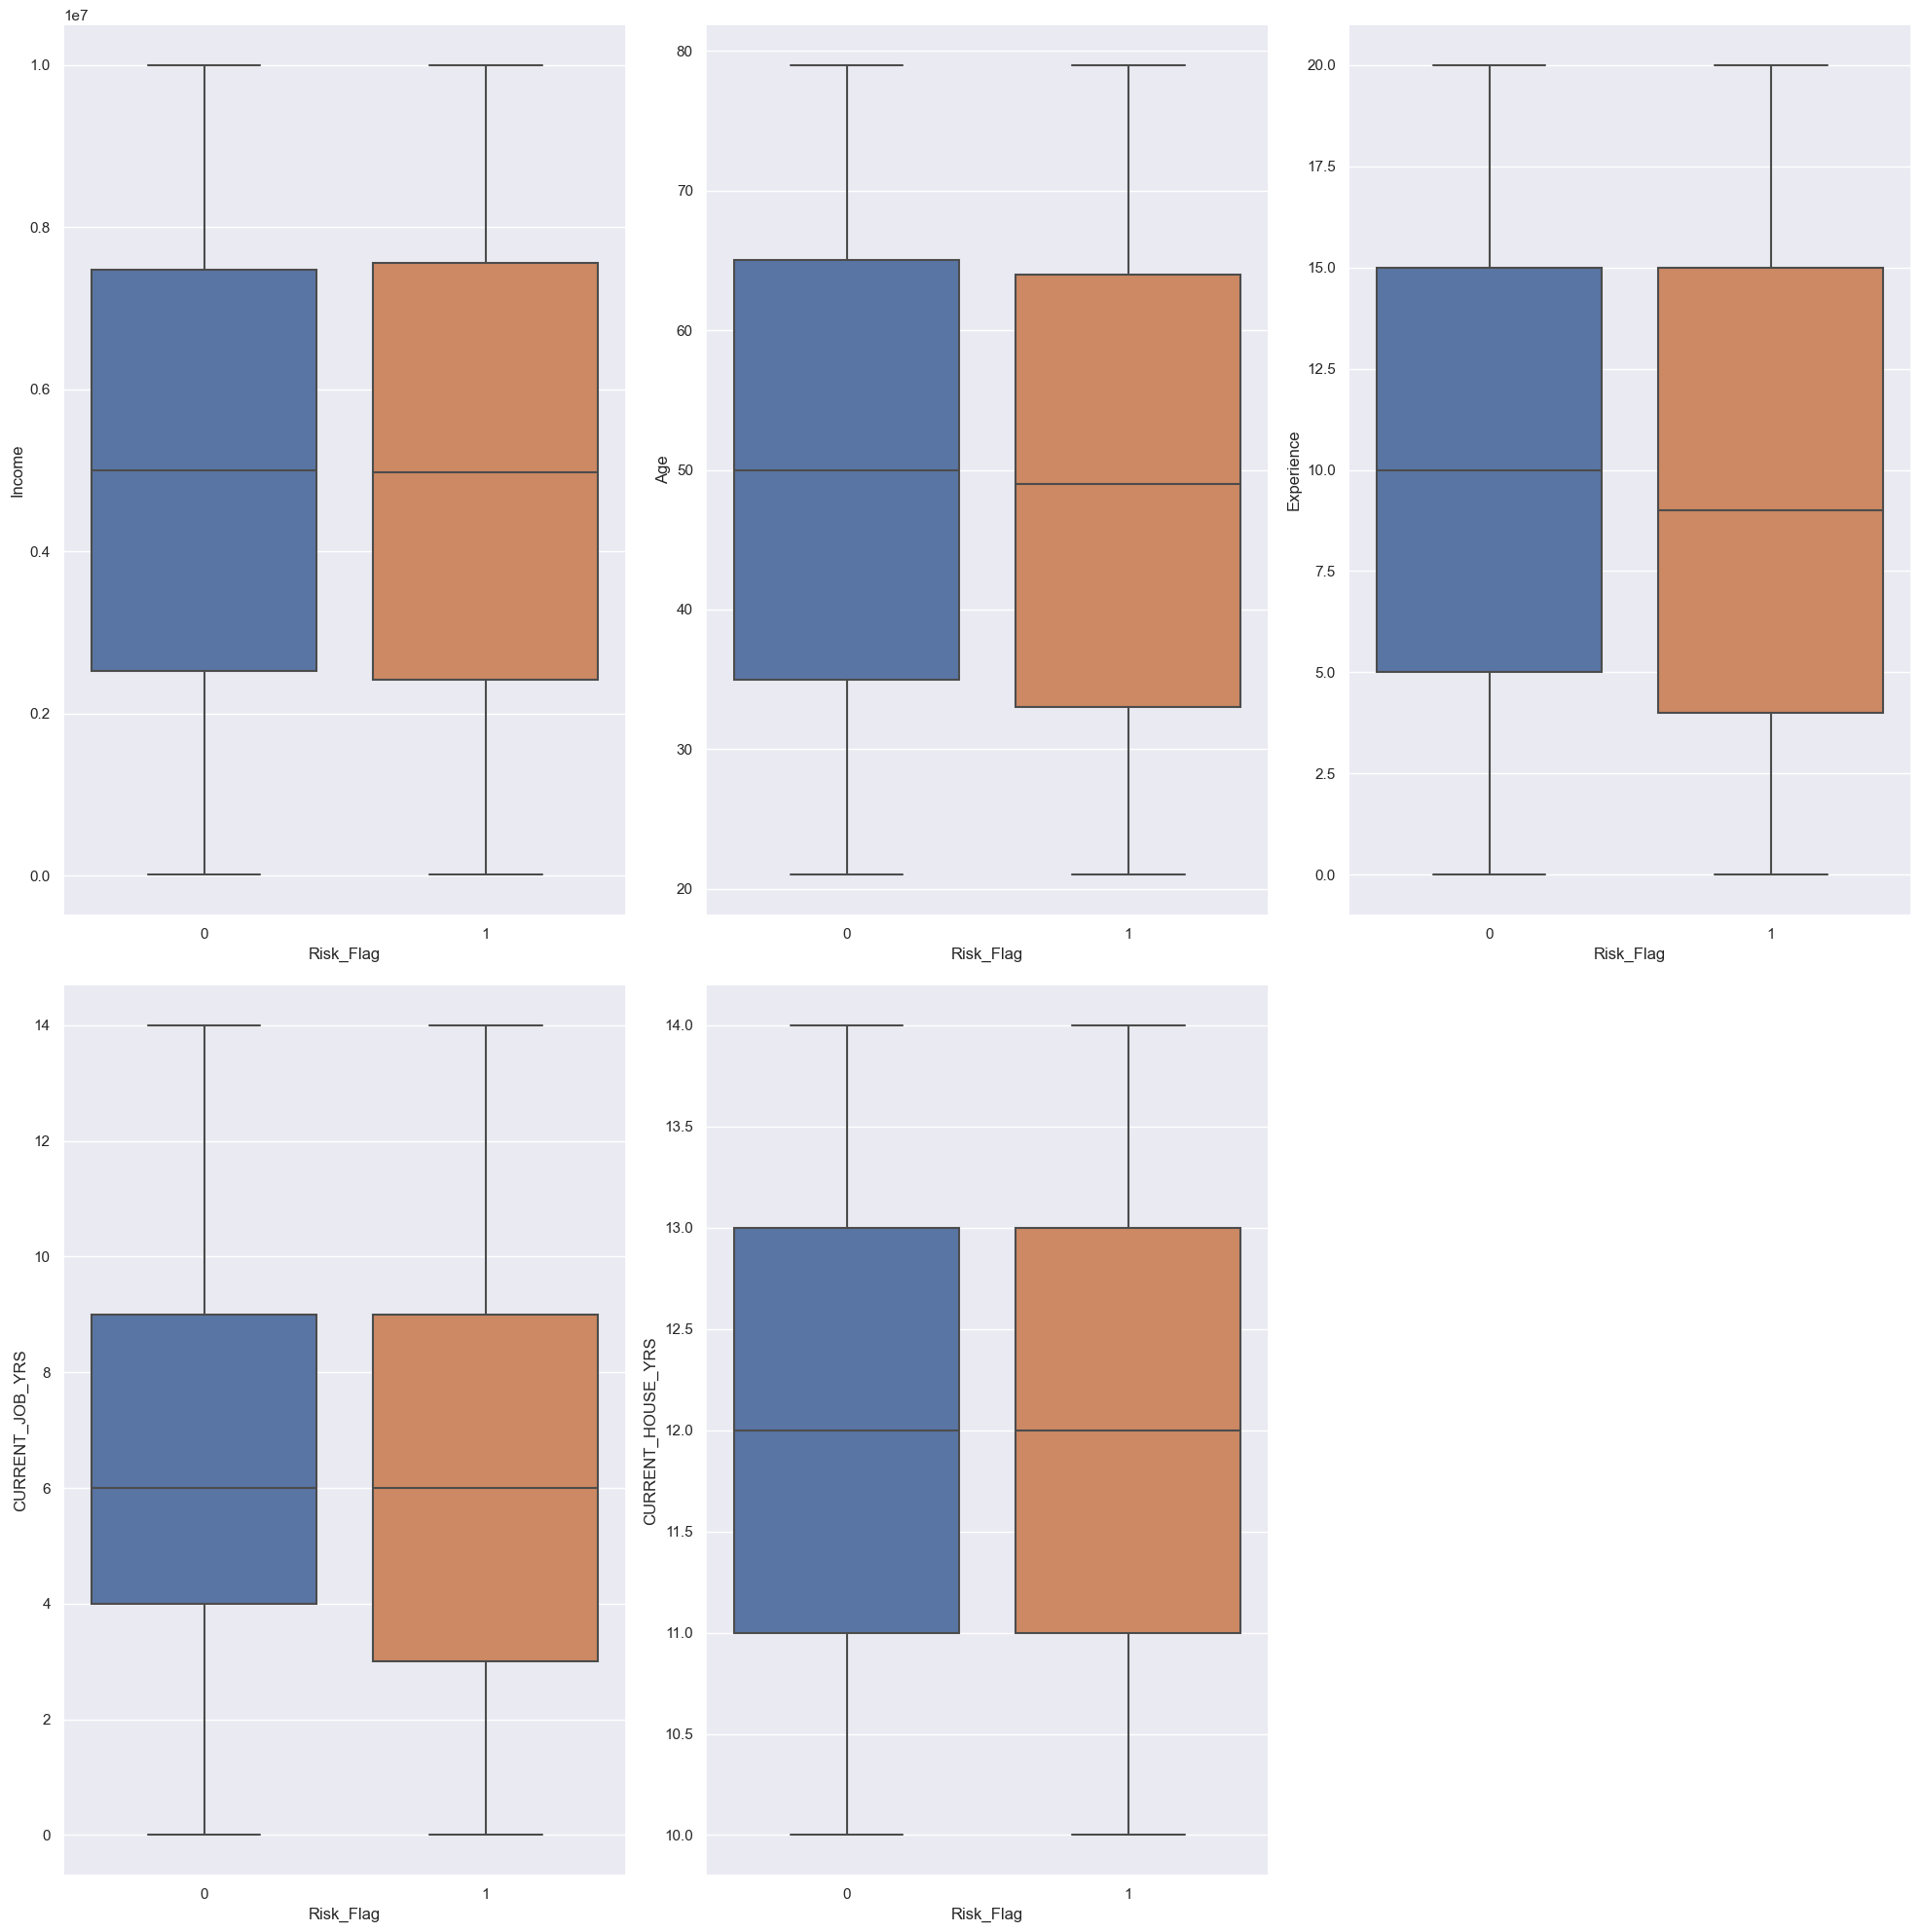

In [18]:
num_vars = ['Income', 'Age', 'Experience', 
            'CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='Risk_Flag', data=data, ax=axs[i])

fig.tight_layout()

# remove the sixth subplot
fig.delaxes(axs[5])

plt.show()

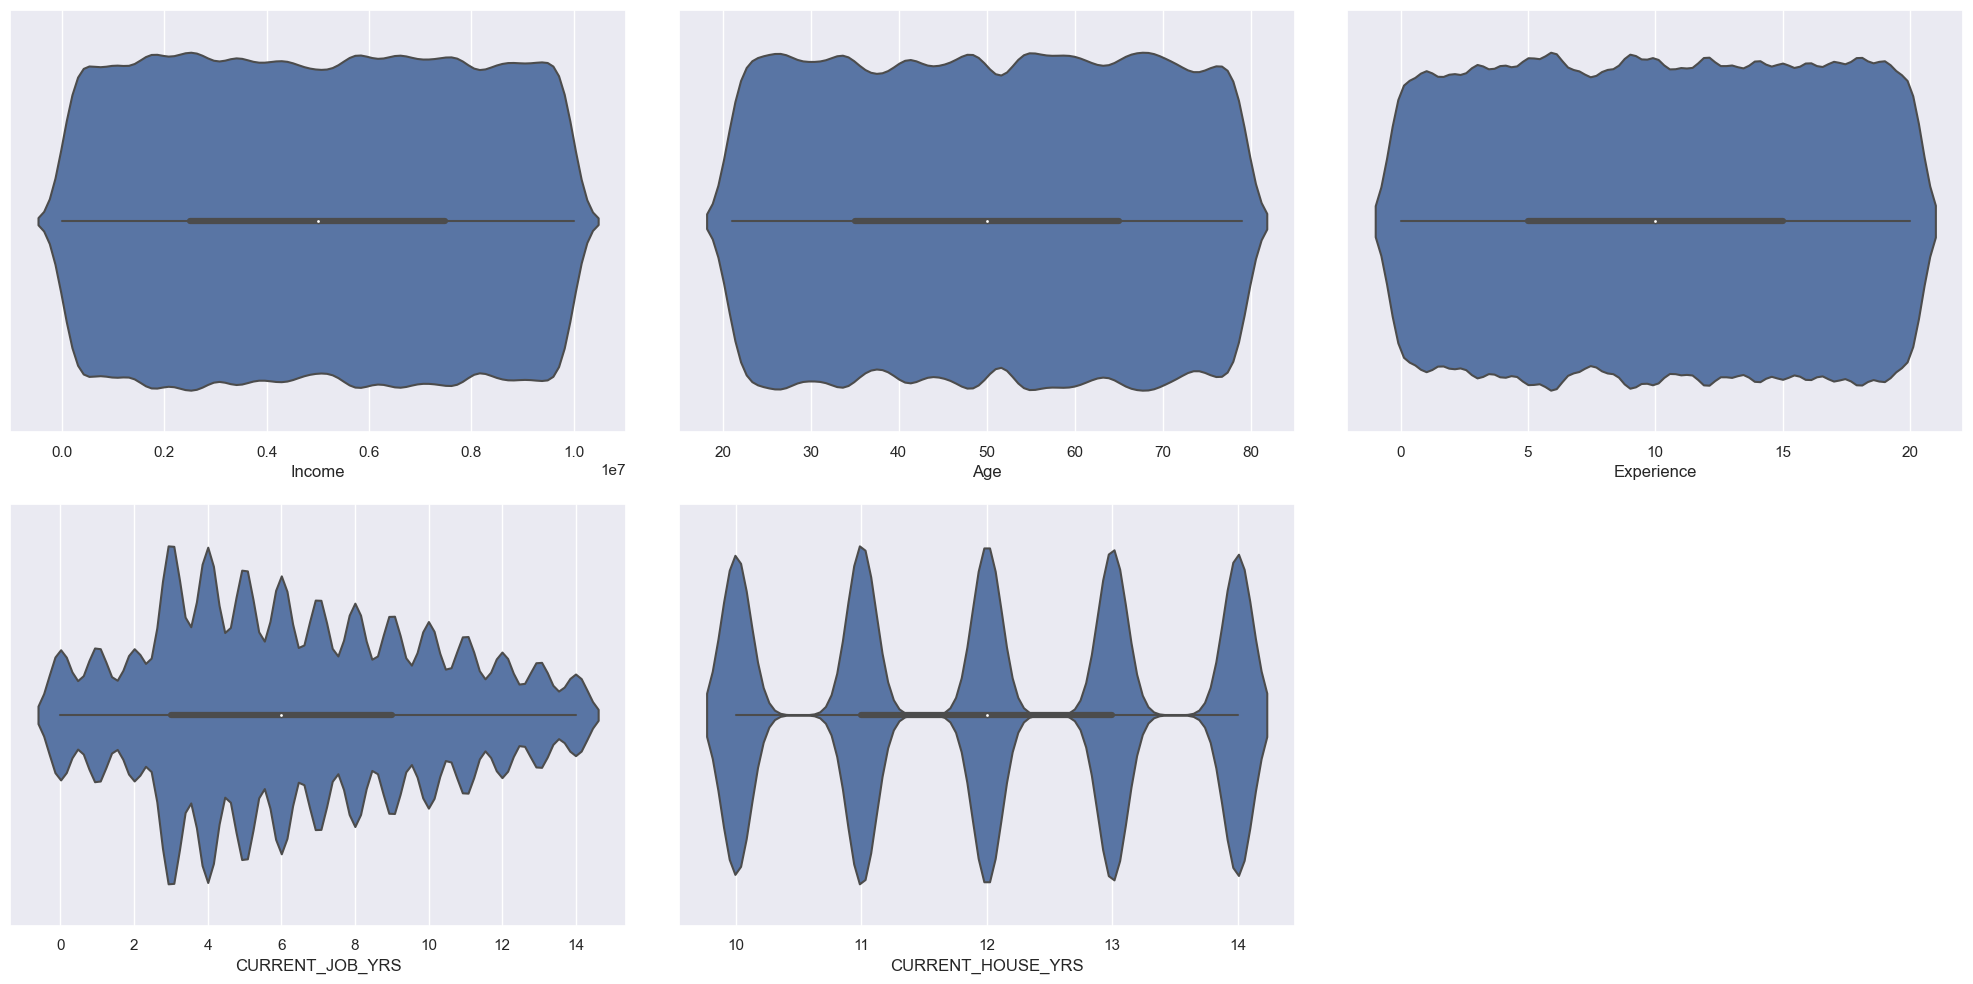

In [19]:
num_vars = ['Income', 'Age', 'Experience', 
            'CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=data, ax=axs[i])

fig.tight_layout()

# remove the sixth subplot
fig.delaxes(axs[5])

plt.show()

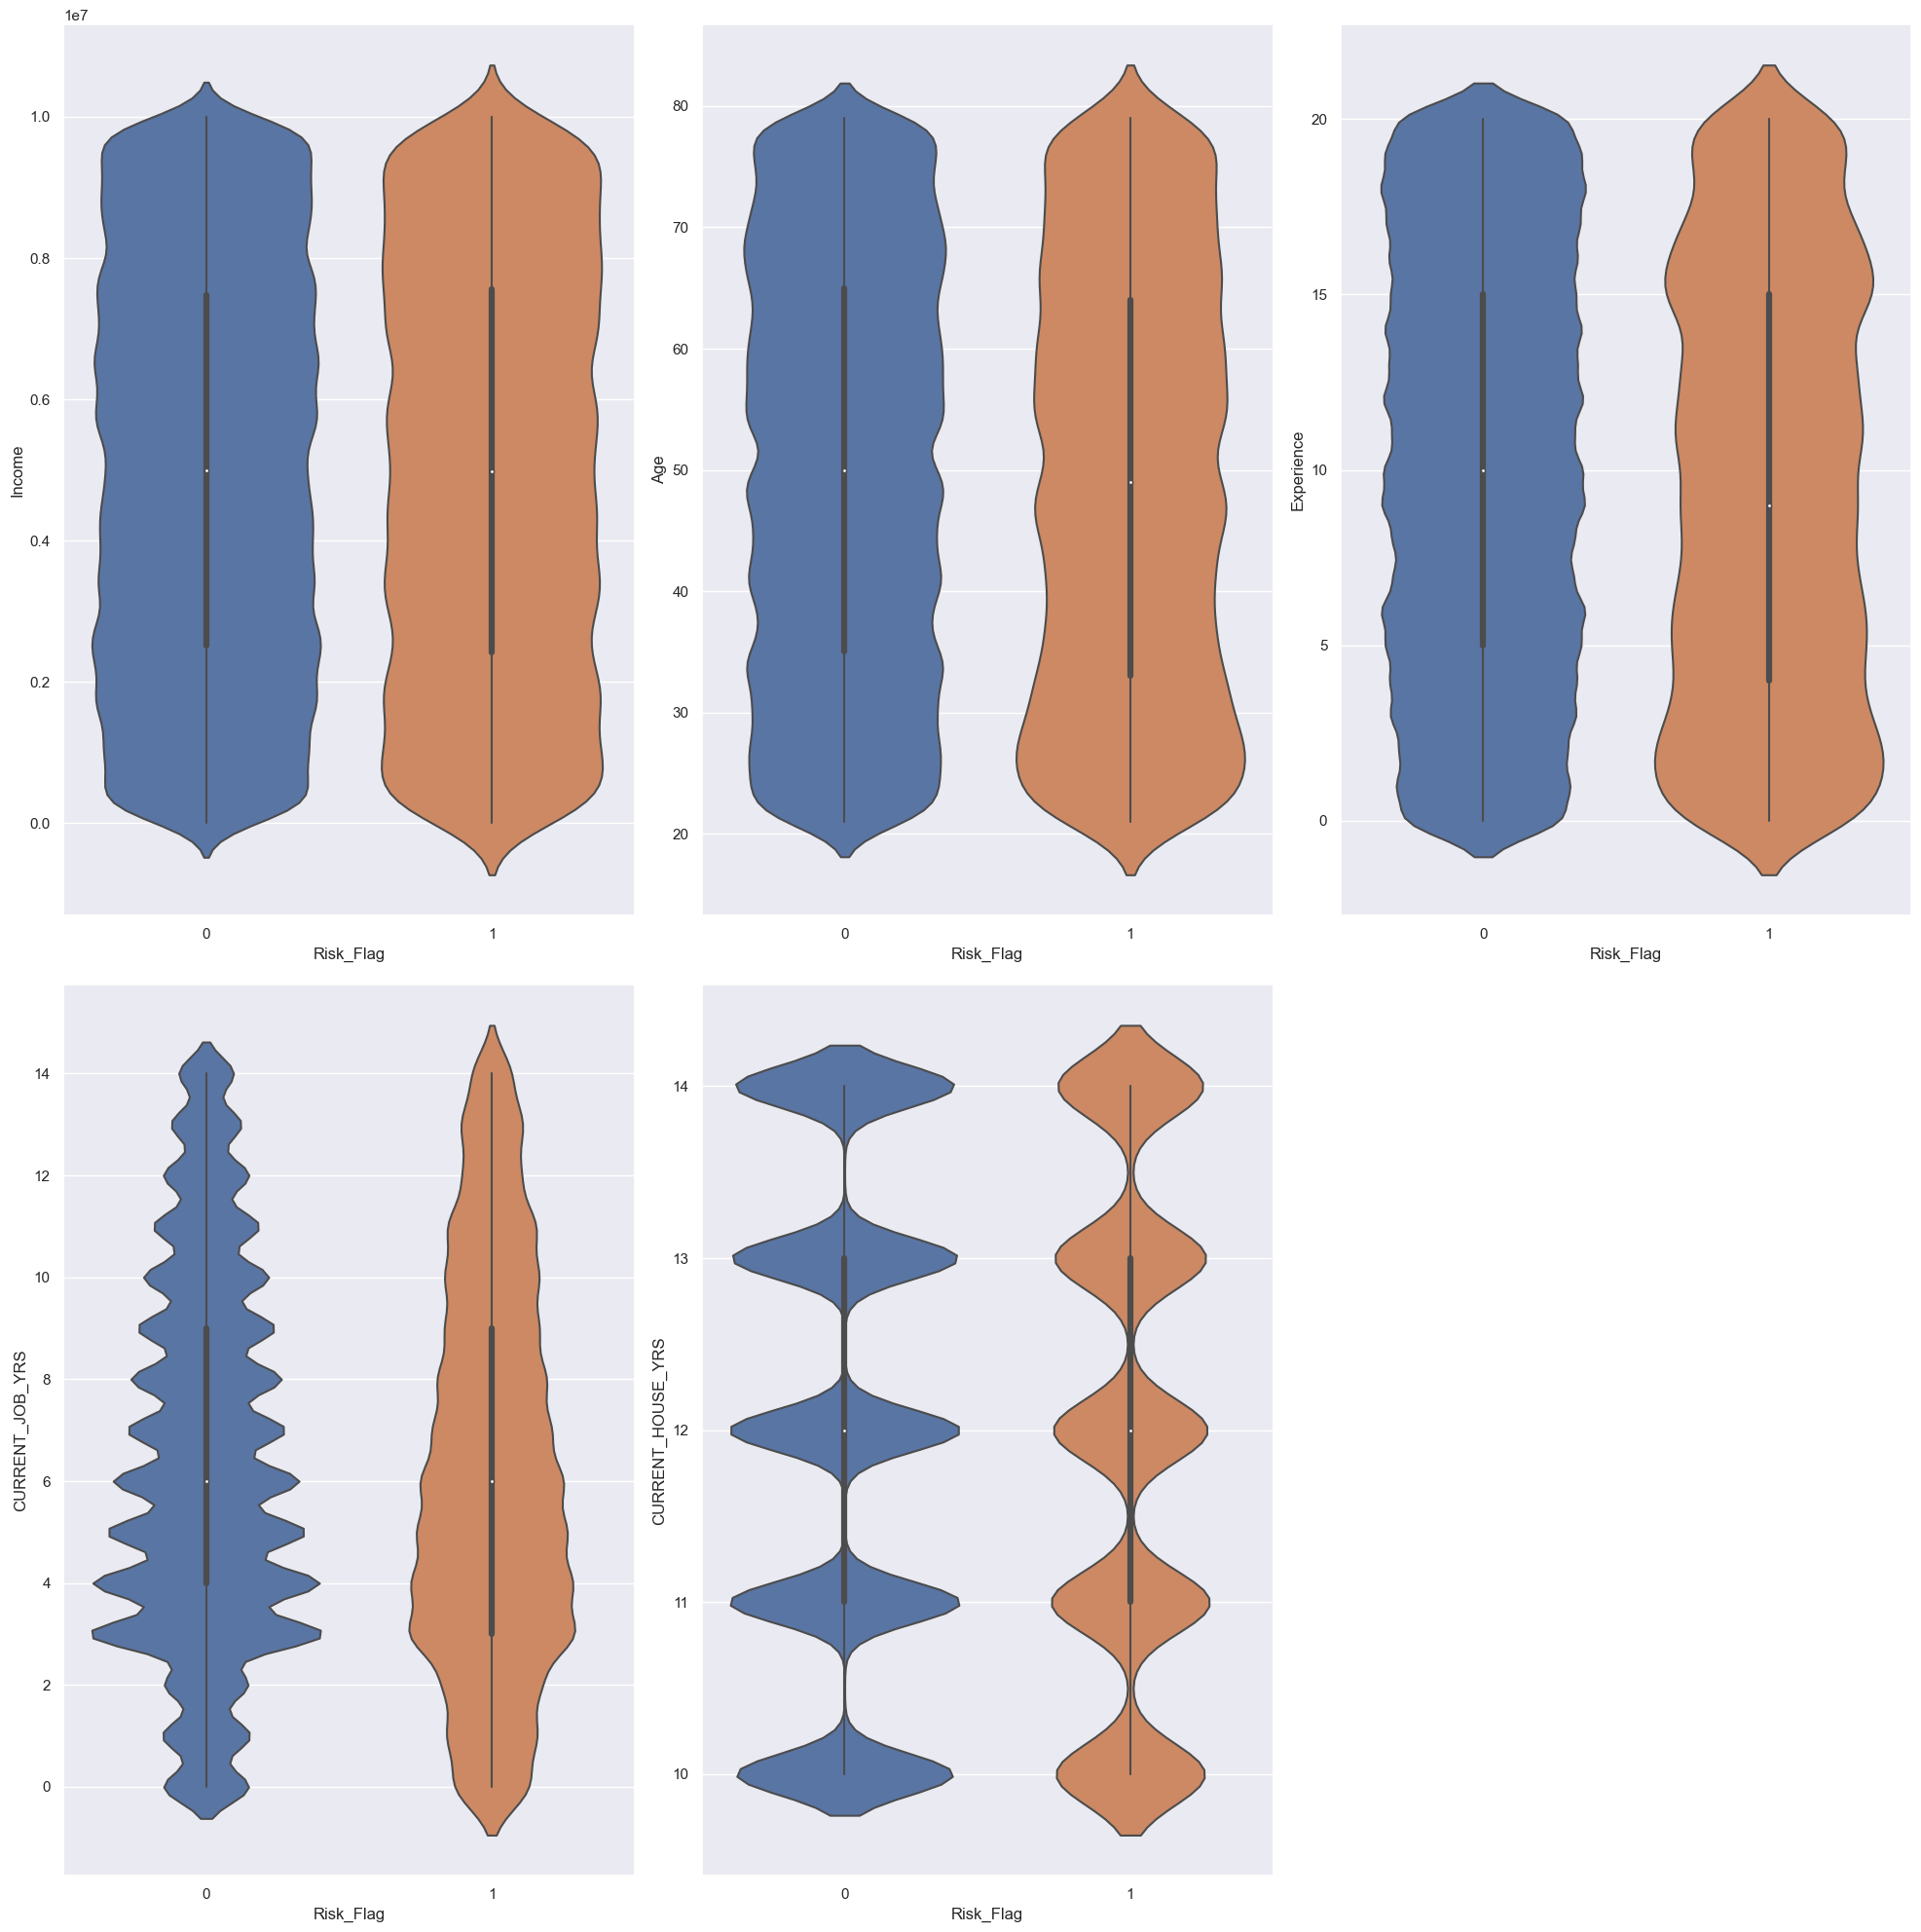

In [20]:
num_vars = ['Income', 'Age', 'Experience', 
            'CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(y=var, data=data, x='Risk_Flag', ax=axs[i])

fig.tight_layout()

# remove the sixth subplot
fig.delaxes(axs[5])

plt.show()

# Data Preprocessing

## Part 2

In [21]:
#Check missing value
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

# Label Encoding for Each Object Datatype

##### Selecting Categorical Columns with their Unique Values

In [22]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in data.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {data[col].unique()}")

Married/Single: ['single' 'married']
House_Ownership: ['rented' 'norent_noown' 'owned']
Car_Ownership: ['no' 'yes']
Profession: ['Engineering' 'IT/Software' 'Government' 'Education' 'Finance' 'Aviation'
 'Design' 'Medical' 'Other' 'Art' 'Entertainment' 'Administration'
 'Finance/Accounting' 'Science Research' 'Hospitality']
STATE: ['Central India' 'West India' 'South India' 'East India'
 'North-West India' 'North India' 'North-East India' 'Unknown']


##### Label Encoding the Unique Values

In [23]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in data.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(data[col].unique())
    
    # Transform the column using the encoder
    data[col] = label_encoder.transform(data[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {data[col].unique()}")

Married/Single: [1 0]
House_Ownership: [2 0 1]
Car_Ownership: [0 1]
Profession: [ 5 11  9  4  7  2  3 12 13  1  6  0  8 14 10]
STATE: [0 7 5 1 4 2 3 6]


# Correlation Heatmap

<AxesSubplot:>

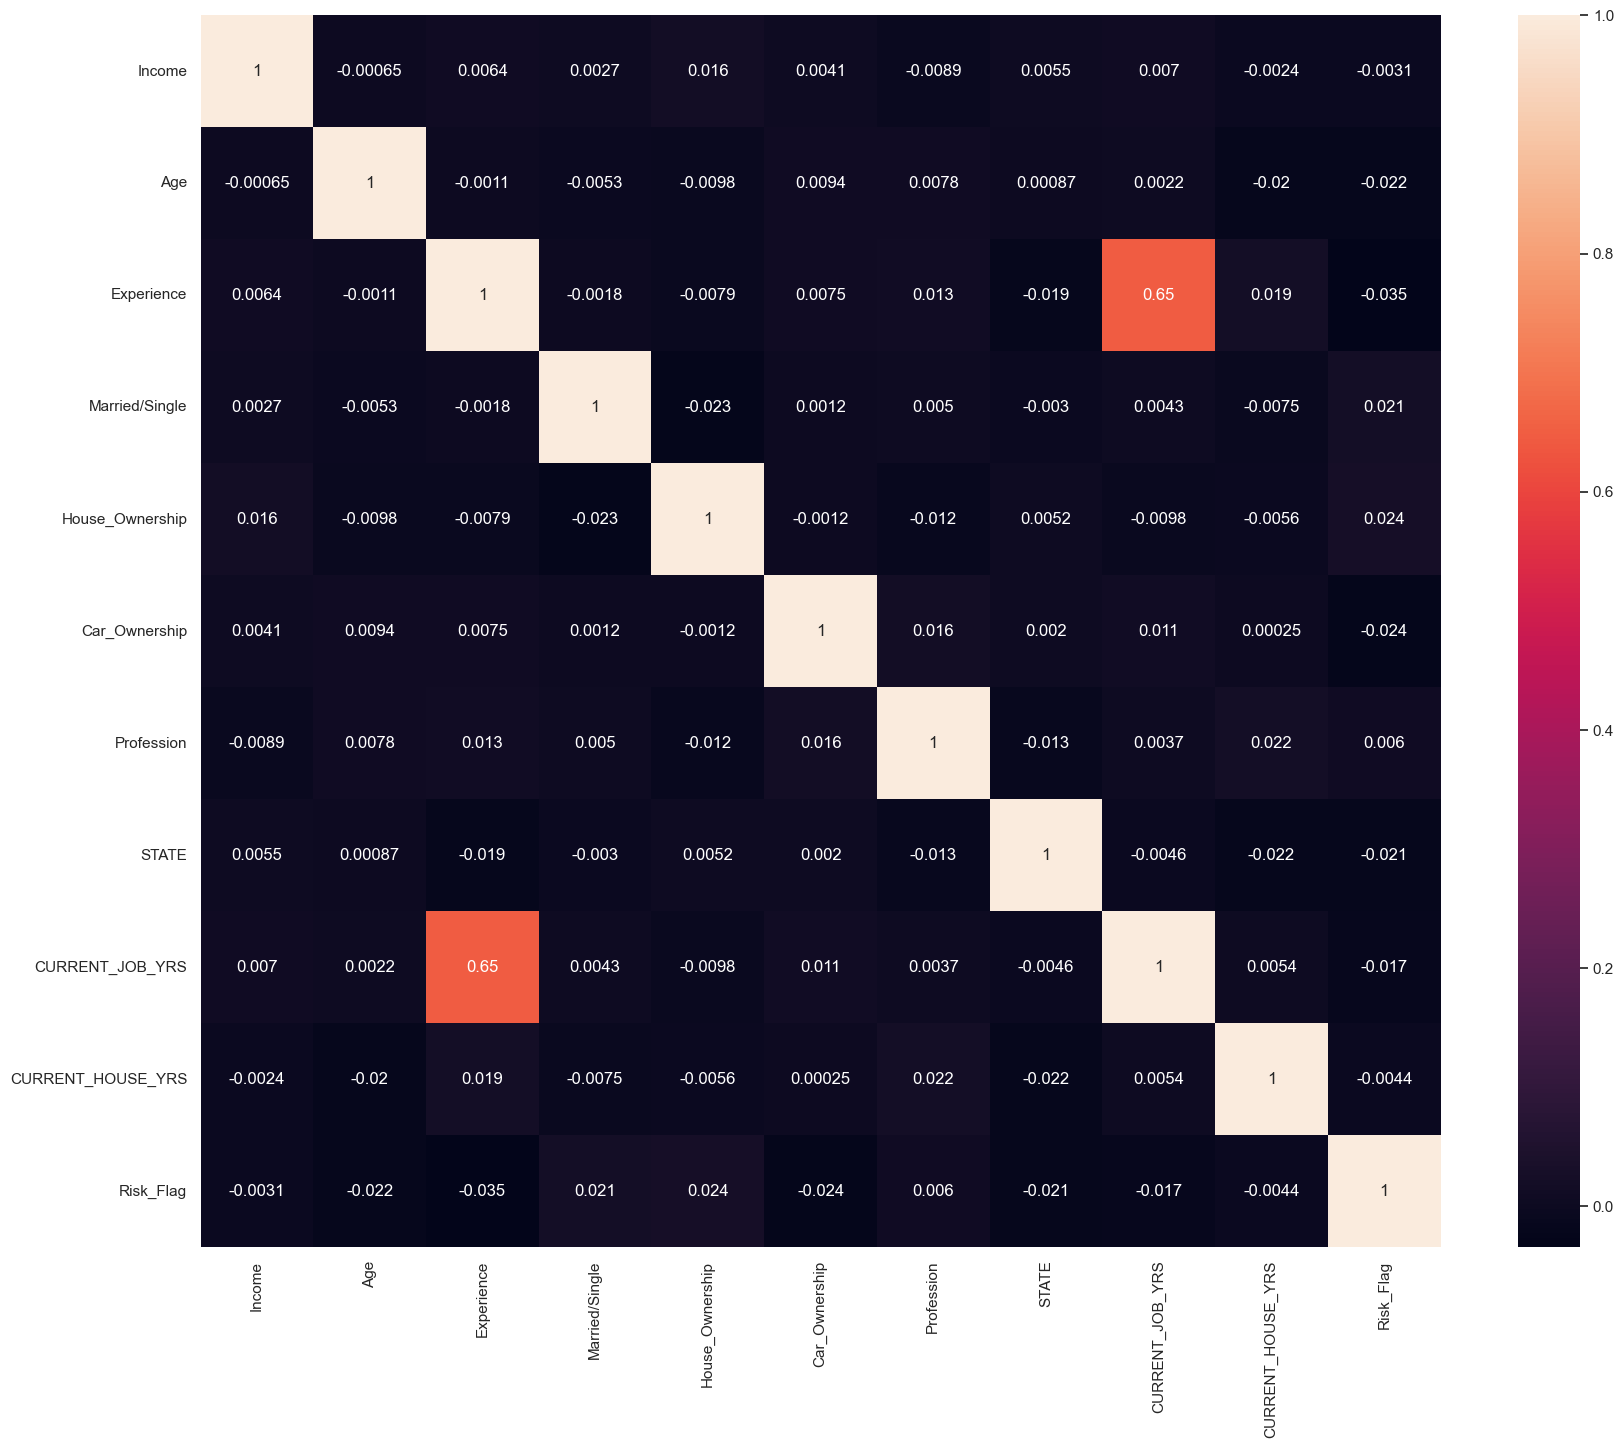

In [24]:
#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20, 16))
sns.heatmap(data.corr(), annot=True)

# Train-Test Split 

In [25]:
from sklearn.model_selection import train_test_split
# Select the features (X) and the target variable (y)
X = data.drop('Risk_Flag', axis=1)
y = data['Risk_Flag']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_leaf=1, min_samples_split=2, 
                               class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=0)

In [27]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 70.24 %


In [28]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.7024007936507937
Precision Score :  0.7024007936507937
Recall Score :  0.7024007936507937
Jaccard Score :  0.541307971069894
Log Loss :  10.278883849164705


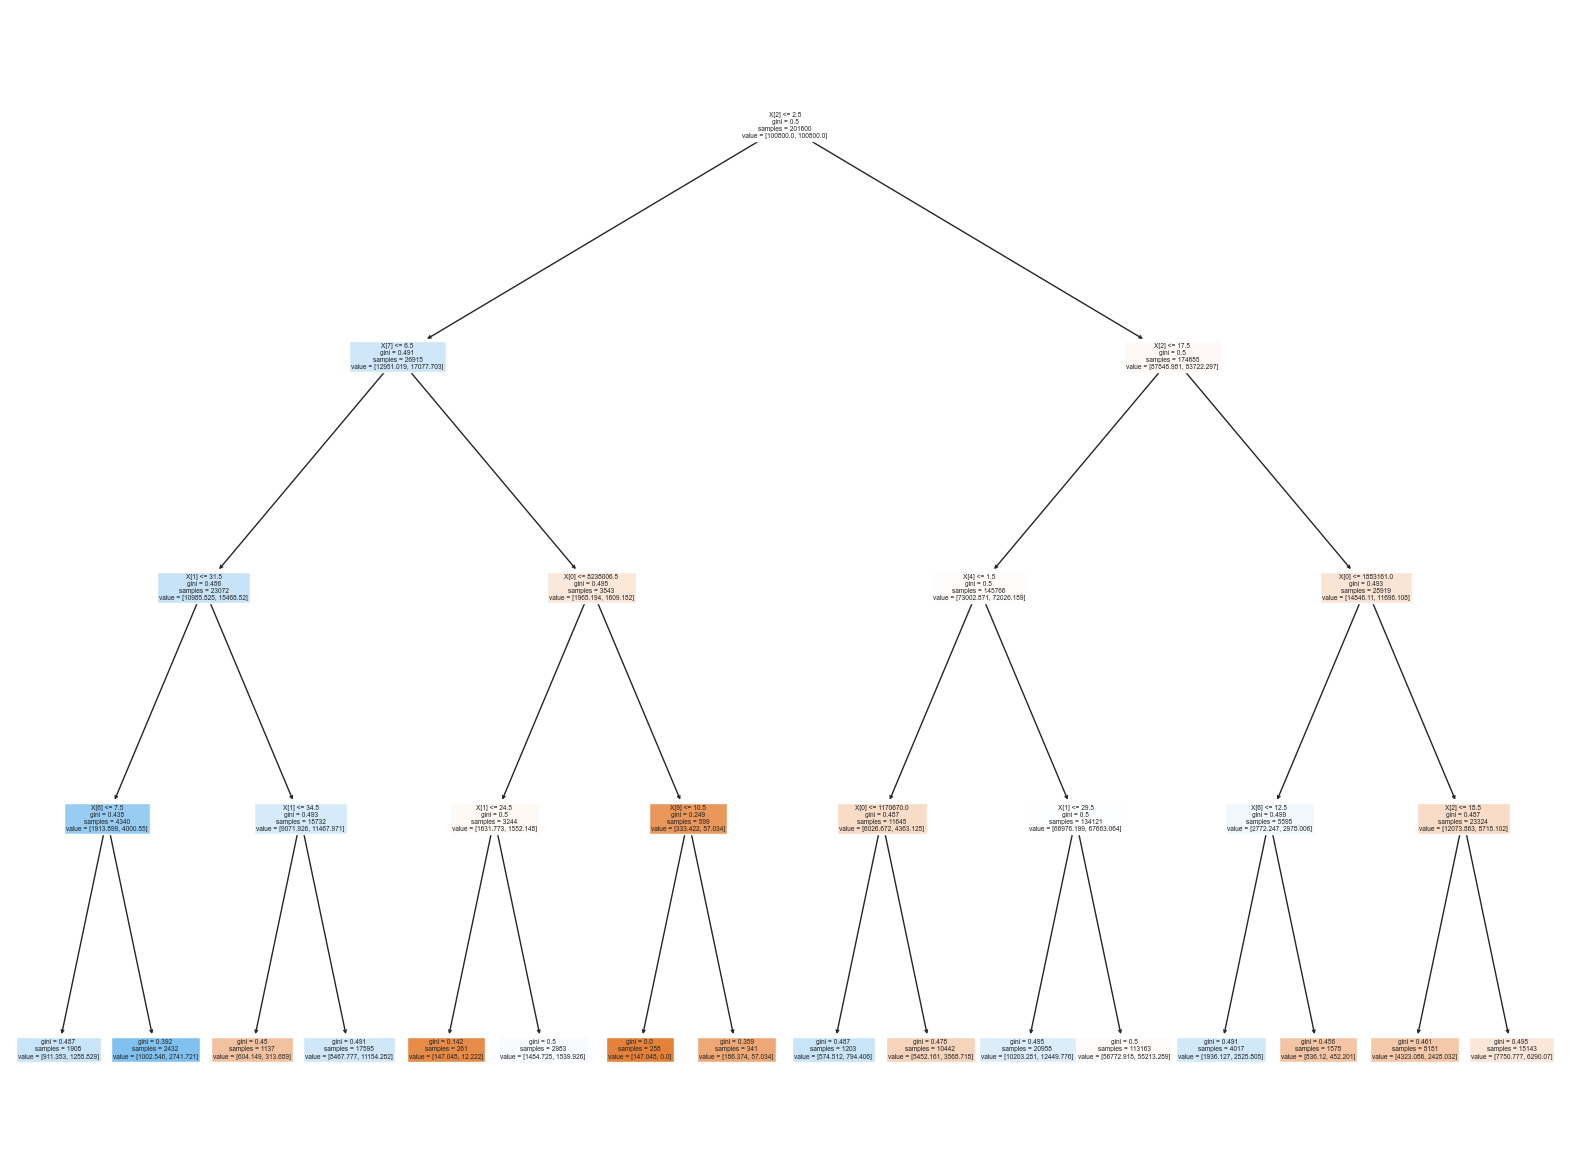

In [29]:
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(dtree,filled=True)
plt.show()

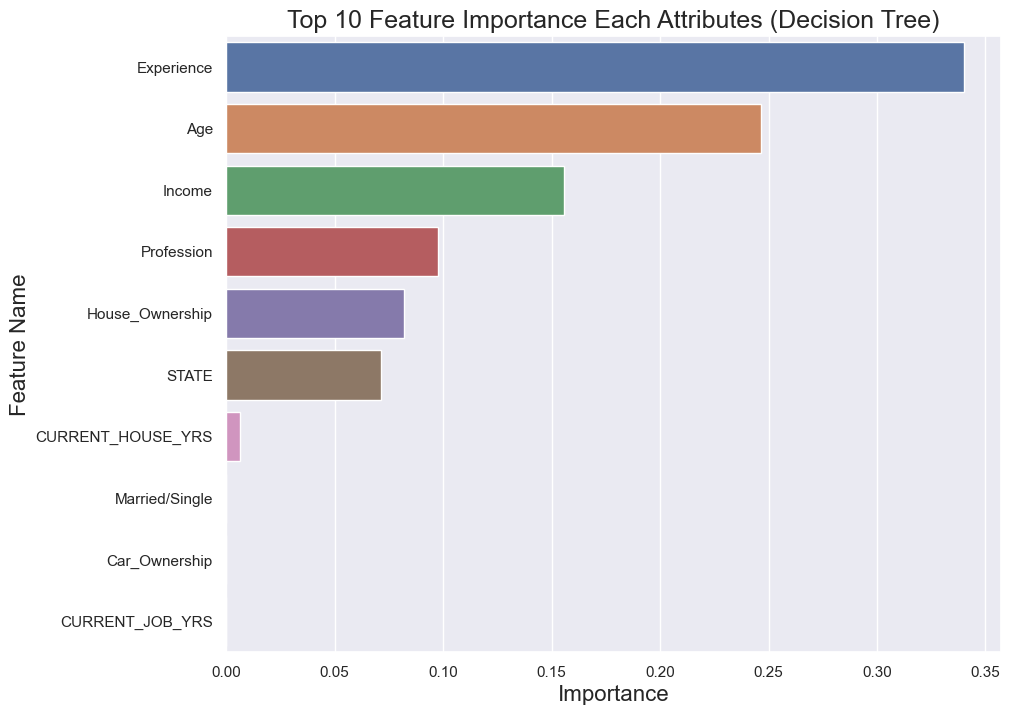

In [30]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_ })
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [31]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


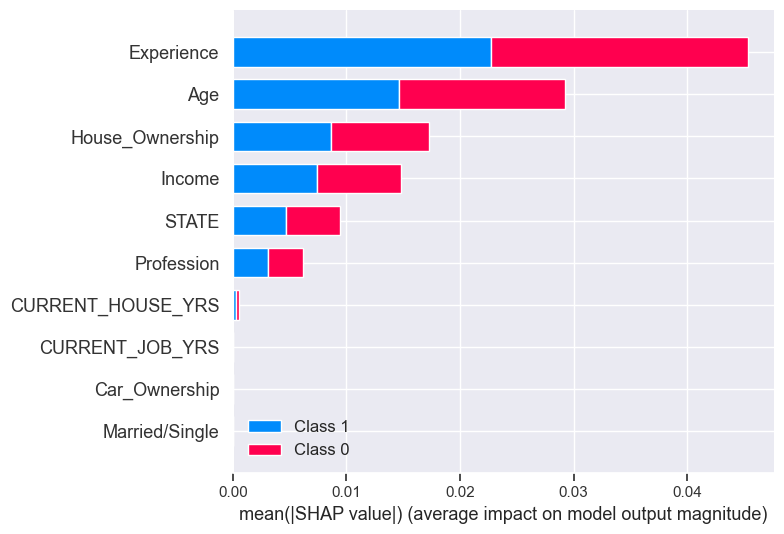

In [32]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

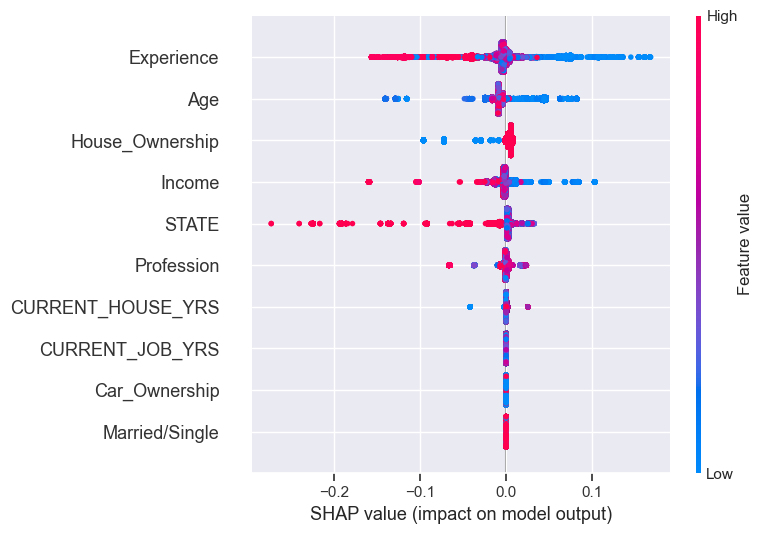

In [33]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

In [34]:
def useModel(model, X_data, y_data):

    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("The Classification report : ")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Plotting confusion matrix
    sns.set_palette(sns.color_palette())
    ax = plt.subplots(figsize=(6,6))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',cmap = 'Blues', annot_kws={"size": 20})  
    labels = ['False', 'True']
    ax.set_xticklabels(labels, fontsize=13);
    ax.set_yticklabels(labels[::-1], fontsize=13);
    ax.set_ylabel('Prediction', fontsize=13);
    ax.set_xlabel('Ground Truth', fontsize=13)
    ax.set_title("Confussion - Matix")

The Classification report : 
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     66329
           1       0.51      0.58      0.54      9271

    accuracy                           0.88     75600
   macro avg       0.73      0.75      0.74     75600
weighted avg       0.89      0.88      0.88     75600



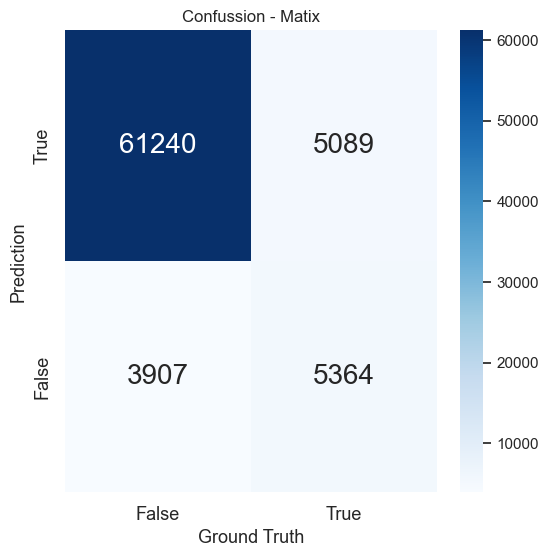

In [35]:
# Using Decision-Tree-Classifier

from sklearn.tree import DecisionTreeClassifier

useModel(DecisionTreeClassifier(), X, y)

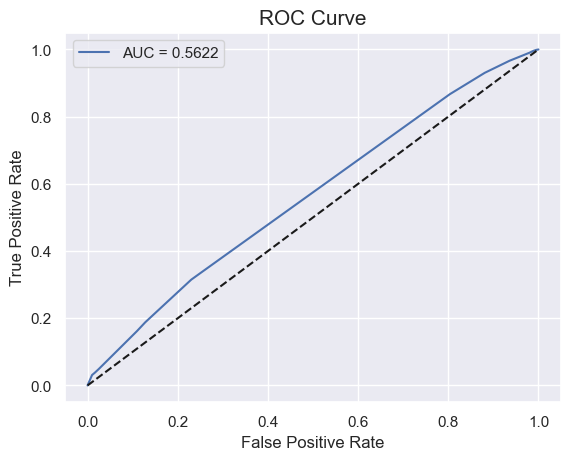

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba,
                                                                                                    columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       n_estimators=200, random_state=0)

In [38]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 89.54 %


In [39]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8953769841269841
Precision Score :  0.8953769841269841
Recall Score :  0.8953769841269841
Jaccard Score :  0.810572449841036
Log Loss :  3.613611253972147


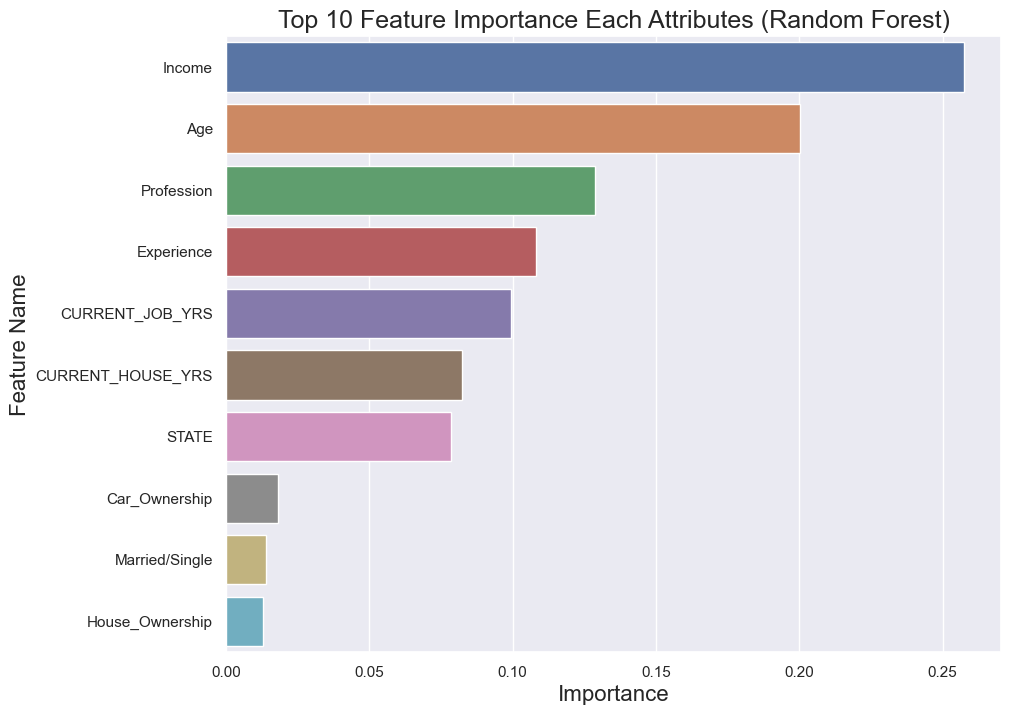

In [40]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()